## Name: Devshekhar Pattnaik
## Reg No: 19BCE1292
## Slot: L1+2

# <center><u>ML Lab-6 </u></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Admission dataset

In [2]:
df = pd.read_csv("Admission_Predict.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.tail())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.

In [3]:
#how many has got admissions out of 400
print(df[df['Chance of Admit']=='yes'].count())

Serial No.           367
GRE Score            367
TOEFL Score          367
University Rating    367
SOP                  367
LOR                  367
CGPA                 367
Research             367
Chance of Admit      367
dtype: int64


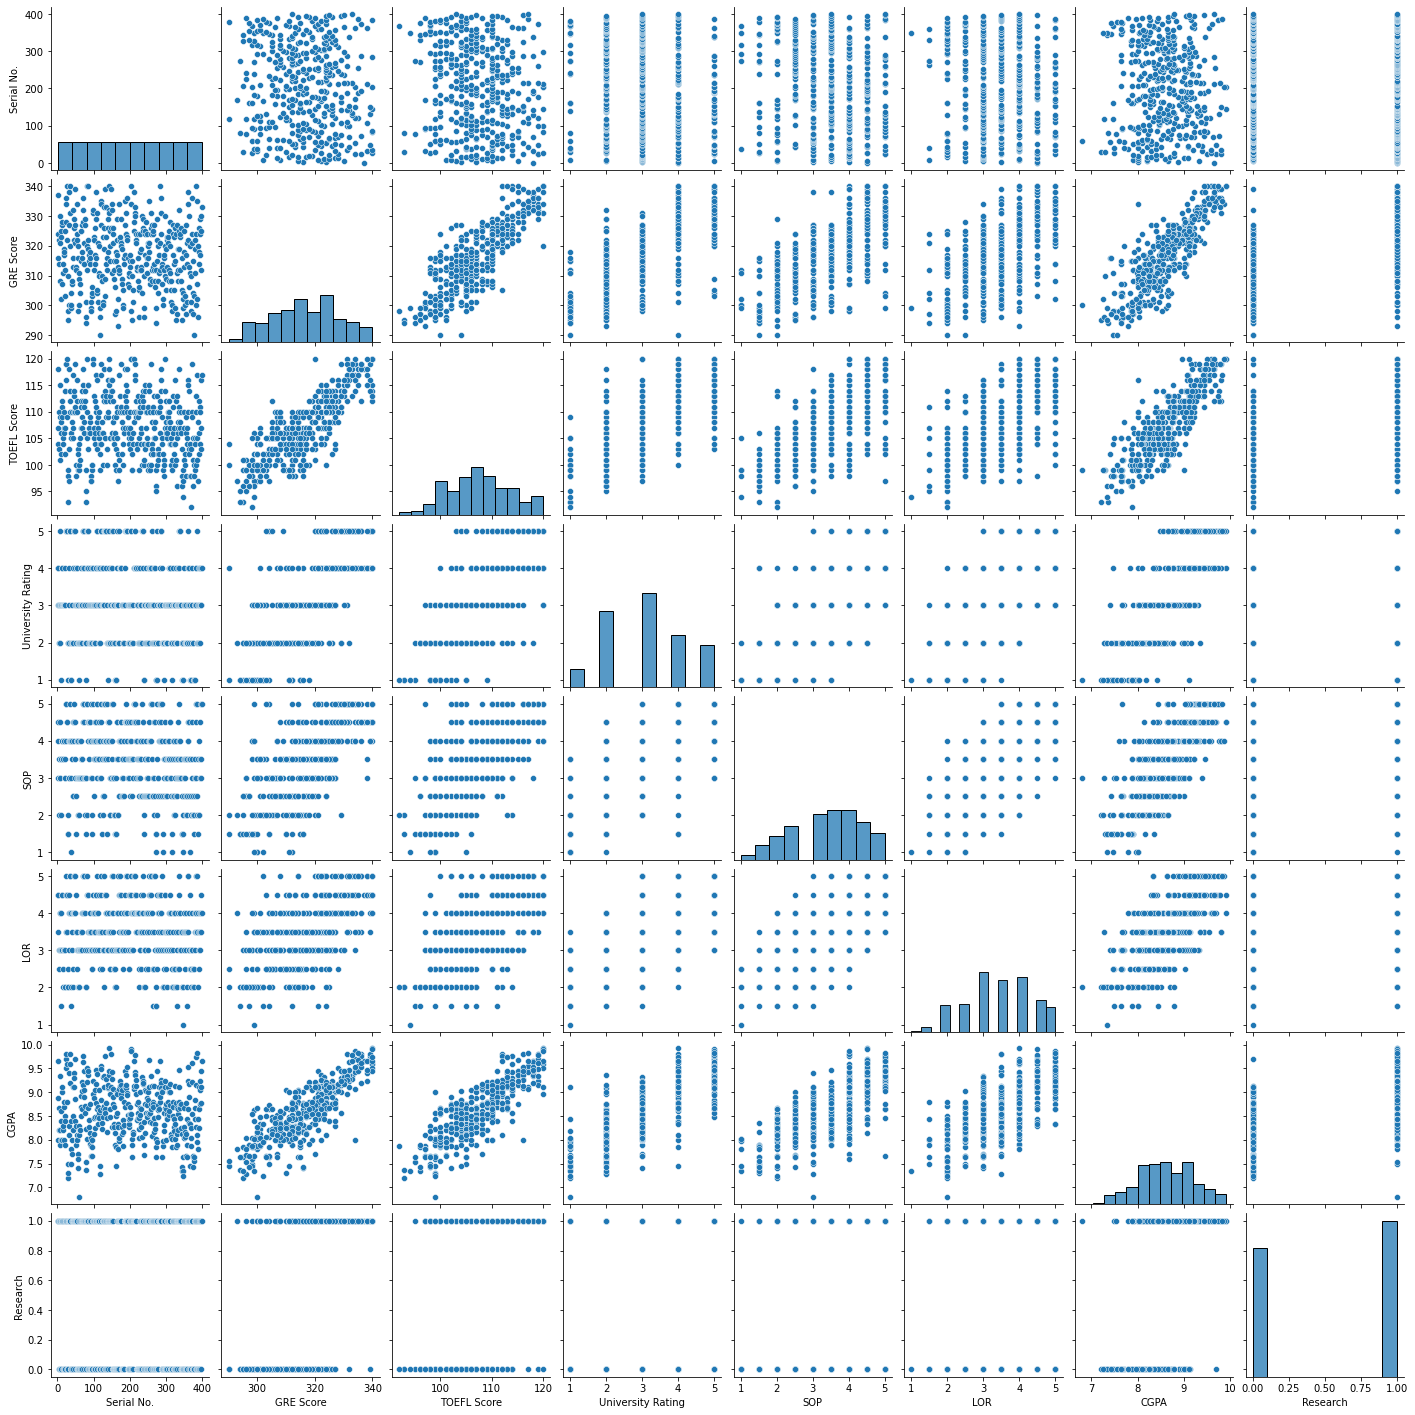

In [4]:
sb.pairplot(df)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP      LOR       CGPA  Research  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138  
GRE Score          0.612831  0.557555  0.833060  0.580391  
TOEFL Score        0.657981  0.567721  0.828417  0.489858  
University Rating  0.734523  0.660123  0.746479  0.447783  
SOP            

<AxesSubplot:>

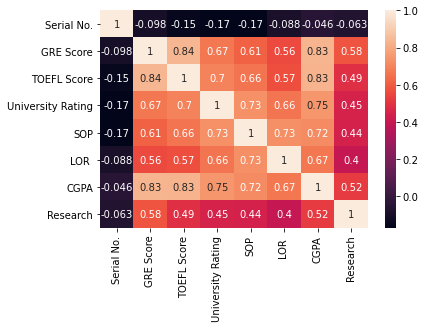

In [5]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [6]:
#checking the missing values
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#Removing the serial no and retaining it
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,yes


In [9]:
#train and test
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
print(df2)
print("\n")
train_x = (df2[:,0:7])
train_y = df2[:,7]
print(train_x)
print("\n")
print("\n")
print(train_y)

[[337 118 4 ... 9.65 1 'yes']
 [324 107 4 ... 8.87 1 'yes']
 [316 104 3 ... 8.0 1 'yes']
 ...
 [330 116 4 ... 9.45 1 'yes']
 [312 103 3 ... 8.78 0 'yes']
 [333 117 4 ... 9.66 1 'yes']]


[[337 118 4 ... 4.5 9.65 1]
 [324 107 4 ... 4.5 8.87 1]
 [316 104 3 ... 3.5 8.0 1]
 ...
 [330 116 4 ... 4.5 9.45 1]
 [312 103 3 ... 4.0 8.78 0]
 [333 117 4 ... 4.0 9.66 1]]




['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes

In [10]:
#min max normalization

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        0.85714286 0.75       ... 0.875      0.84935897 1.        ]
 [0.44       0.39285714 0.5        ... 0.75       0.63461538 0.        ]
 [0.86       0.89285714 0.75       ... 0.75       0.91666667 1.        ]]


In [11]:
#Regression line fitting¶
#In Linear reg we give the calculated value as such
#In log reg we go for sigmodial funct over the computed value 
#and we say prob of placing the particular instance is on Class A or Class B

regress.fit (train_x,train_y)

# The coefficients y= m0x0+m1x1+...m11x11+c
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[ 1.84653573  1.95483918  0.24428078 -0.02699547  1.5526433   2.61487109
   0.44589894]]
Intercept:  [-1.47821059]


In [12]:
#Predictions
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("log_result_1.csv")

yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes

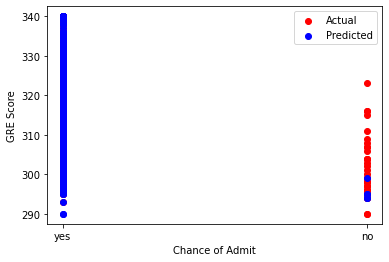

In [13]:
plt.scatter(df['Chance of Admit'],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['Pred'],df['GRE Score'],color = 'blue',label = 'Predicted' )
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')
plt.legend()
plt.show()

In [14]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))

Accucary: 0.93
Confusion Matrix
 [[  5  28]
 [  0 367]]


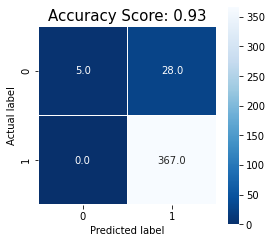

In [15]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [16]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

          no       1.00      0.15      0.26        33
         yes       0.93      1.00      0.96       367

    accuracy                           0.93       400
   macro avg       0.96      0.58      0.61       400
weighted avg       0.93      0.93      0.91       400



# Heart problem dataset

In [17]:
df = pd.read_csv("heartprob.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.tail())

(847, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              847 non-null    int64  
 1   education        847 non-null    int64  
 2   cigsPerDay       847 non-null    int64  
 3   prevalentStroke  847 non-null    int64  
 4   diabetes         847 non-null    int64  
 5   totChol          847 non-null    int64  
 6   sysBP            847 non-null    float64
 7   diaBP            847 non-null    float64
 8   BMI              847 non-null    float64
 9   heartRate        847 non-null    int64  
 10  TenYearCHD       847 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 72.9 KB
None
   age  education  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  \
0   39          4           0                0         0      195  106.0   
1   46          2           0                0         0      250  121.0   
2  

In [18]:
print(df[df['TenYearCHD']==1].count())

age                131
education          131
cigsPerDay         131
prevalentStroke    131
diabetes           131
totChol            131
sysBP              131
diaBP              131
BMI                131
heartRate          131
TenYearCHD         131
dtype: int64


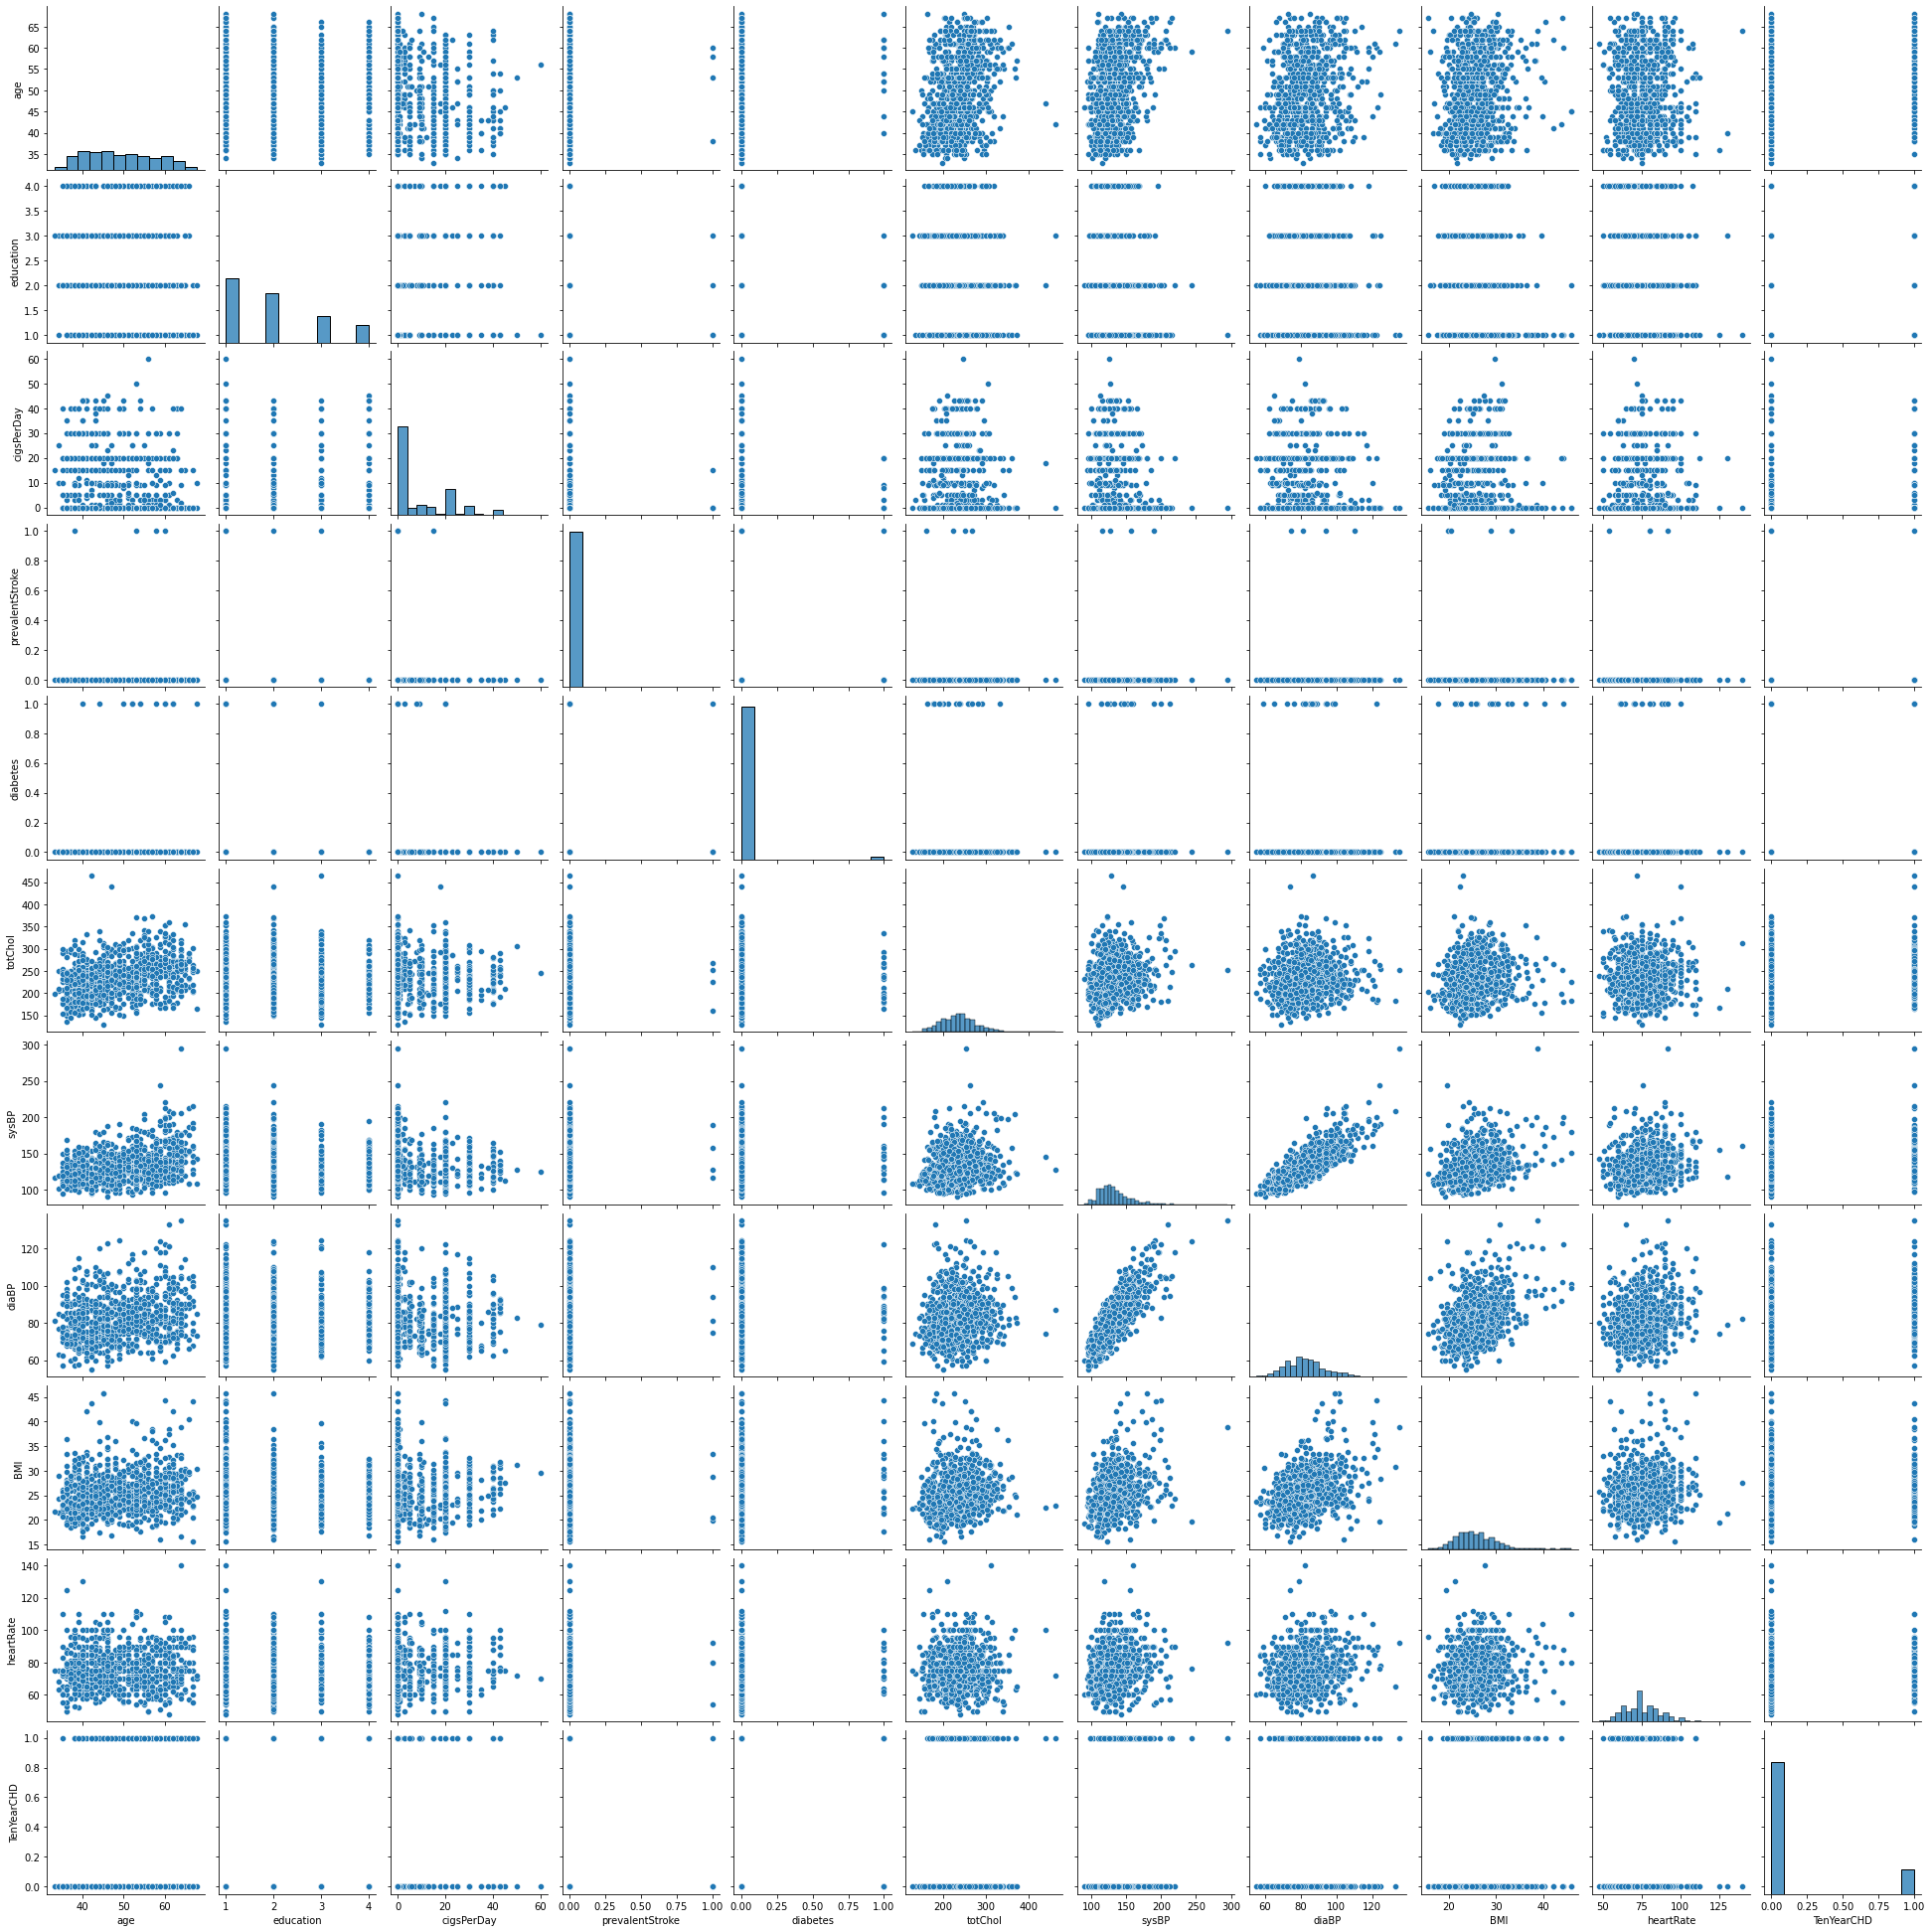

In [19]:
sb.pairplot(df)

In [21]:
df1  = df.corr()
print(df1)

                      age  education  cigsPerDay  prevalentStroke  diabetes  \
age              1.000000  -0.198290   -0.231601         0.023182  0.107992   
education       -0.198290   1.000000    0.052857        -0.015177 -0.088014   
cigsPerDay      -0.231601   0.052857    1.000000        -0.028983 -0.034332   
prevalentStroke  0.023182  -0.015177   -0.028983         1.000000  0.112935   
diabetes         0.107992  -0.088014   -0.034332         0.112935  1.000000   
totChol          0.286831  -0.008391   -0.083963        -0.017232 -0.007472   
sysBP            0.418459  -0.156086   -0.115639         0.044612  0.078670   
diaBP            0.221547  -0.081098   -0.066943         0.039242  0.034775   
BMI              0.143271  -0.163700   -0.104445        -0.002429  0.092740   
heartRate       -0.010857  -0.033646    0.054444         0.002890  0.018028   
TenYearCHD       0.230851  -0.043126    0.045665         0.018162  0.031914   

                  totChol     sysBP     diaBP      

<AxesSubplot:>

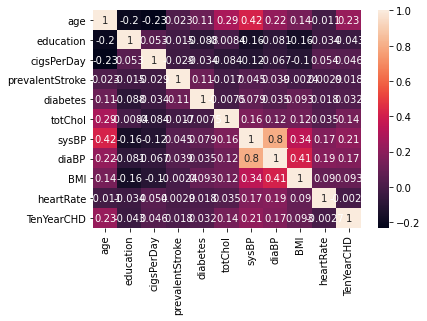

In [22]:
sb.heatmap(df1,annot=True)

In [23]:
#train and test
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
print(df2)
print("\n")
train_x = (df2[:,0:10])
train_y = df2[:,10]
print(train_x)
print("\n")
print("\n")
print(train_y)

[[39.    4.    0.   ... 26.97 80.    0.  ]
 [46.    2.    0.   ... 28.73 95.    0.  ]
 [48.    1.   20.   ... 25.34 75.    0.  ]
 ...
 [53.    1.    0.   ... 27.04 66.    1.  ]
 [46.    4.    9.   ... 32.37 78.    0.  ]
 [51.    2.    6.   ... 23.66 92.    0.  ]]


[[39.    4.    0.   ... 70.   26.97 80.  ]
 [46.    2.    0.   ... 81.   28.73 95.  ]
 [48.    1.   20.   ... 80.   25.34 75.  ]
 ...
 [53.    1.    0.   ... 84.   27.04 66.  ]
 [46.    4.    9.   ... 94.   32.37 78.  ]
 [51.    2.    6.   ... 89.   23.66 92.  ]]




[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.17142857 1.         0.         ... 0.1875     0.37772637 0.34782609]
 [0.37142857 0.33333333 0.         ... 0.325      0.43588896 0.51086957]
 [0.42857143 0.         0.33333333 ... 0.3125     0.32385988 0.29347826]
 ...
 [0.57142857 0.         0.         ... 0.3625     0.38003966 0.19565217]
 [0.37142857 1.         0.15       ... 0.4875     0.55617978 0.32608696]
 [0.51428571 0.33333333 0.1        ... 0.425      0.26834104 0.47826087]]


In [25]:
regress.fit (train_x,train_y)

# The coefficients y= m0x0+m1x1+...m11x11+c
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[ 2.05615713  0.01401784  1.29858925  0.13337205  0.09363013  1.25402502
   1.11064606  1.12042548  0.45565817 -0.42007051]]
Intercept:  [-4.07615504]


In [26]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("result_heartprob.csv")

0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0


In [28]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))

Accucary: 0.8441558441558441
Confusion Matrix
 [[714   2]
 [130   1]]


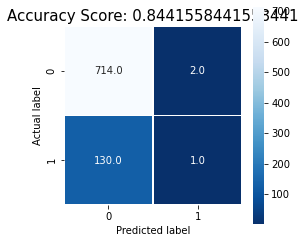

In [29]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [30]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       716
         1.0       0.33      0.01      0.01       131

    accuracy                           0.84       847
   macro avg       0.59      0.50      0.47       847
weighted avg       0.77      0.84      0.78       847



In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 0.15584415584415584
Mean Squared Error: 0.15584415584415584
Root Mean Squared Error: 0.39477101697586137


In [32]:
print(df['age'].min())
print(df['age'].max())

33
68


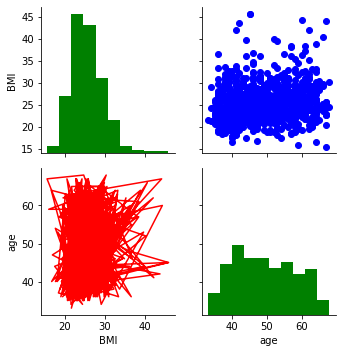

In [33]:
g = sb.PairGrid(data=df, vars=['BMI','age'])
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='green')